In [9]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df["label"] = cluster.labels_
df

In [6]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
# every K: score
from sklearn.metrics import silhouette_score
for k in range(2, 20):
    test = KMeans(n_clusters=k)
    test.fit(iris["data"])
    score = silhouette_score(iris["data"], test.labels_)
    print("[K]:", k, "[Score]:", score)

[K]: 2 [Score]: 0.681046169211746
[K]: 3 [Score]: 0.5528190123564091
[K]: 4 [Score]: 0.4980505049972867
[K]: 5 [Score]: 0.4887488870931048
[K]: 6 [Score]: 0.3664804028900824
[K]: 7 [Score]: 0.3568618172536361
[K]: 8 [Score]: 0.35974549238457515
[K]: 9 [Score]: 0.31185768885438425
[K]: 10 [Score]: 0.32957764695053643
[K]: 11 [Score]: 0.2929435543157583
[K]: 12 [Score]: 0.2985162065516929
[K]: 13 [Score]: 0.3013627836837866
[K]: 14 [Score]: 0.2591919379027181
[K]: 15 [Score]: 0.28043236830487844
[K]: 16 [Score]: 0.29076195583707937
[K]: 17 [Score]: 0.2858109867185117
[K]: 18 [Score]: 0.28537297849330406
[K]: 19 [Score]: 0.27604231710853083


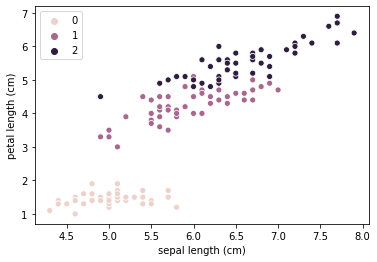

In [10]:
import seaborn as sns
sns.scatterplot(x=df["sepal length (cm)"],
                y=df["petal length (cm)"],
                hue=iris["target"])